In [64]:
import cv2
import numpy as np

In [74]:
img = cv2.imread("3.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

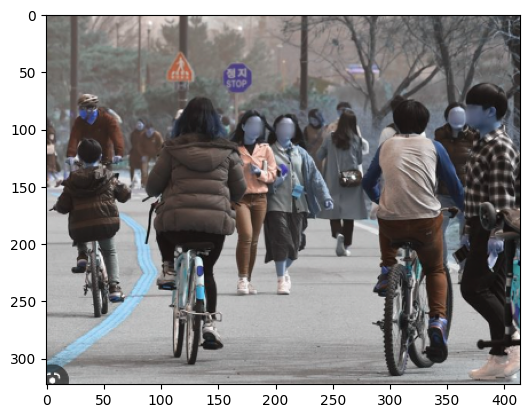

In [66]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [67]:
net = cv2.dnn.readNet("yolov3.cfg","yolov3.weights")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [72]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.001, (416, 416), (0, 0, 0))
net.setInput(blob)
outs = net.forward(output_layers)

In [73]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5 and class_id == 0:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(len(indexes)) #### 사람수 

2


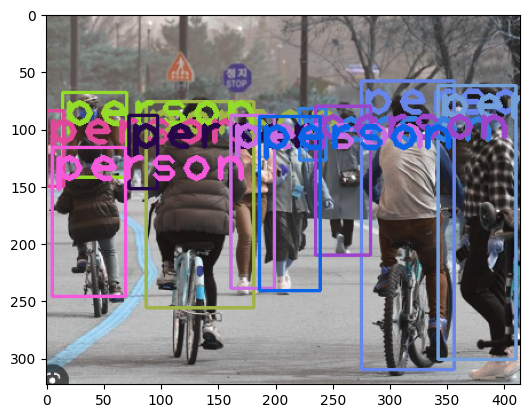

In [71]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
        
import matplotlib.pyplot as plt
plt.imshow(img)
# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()